![Movie popcorn on red background](redpopcorn.jpg)


## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

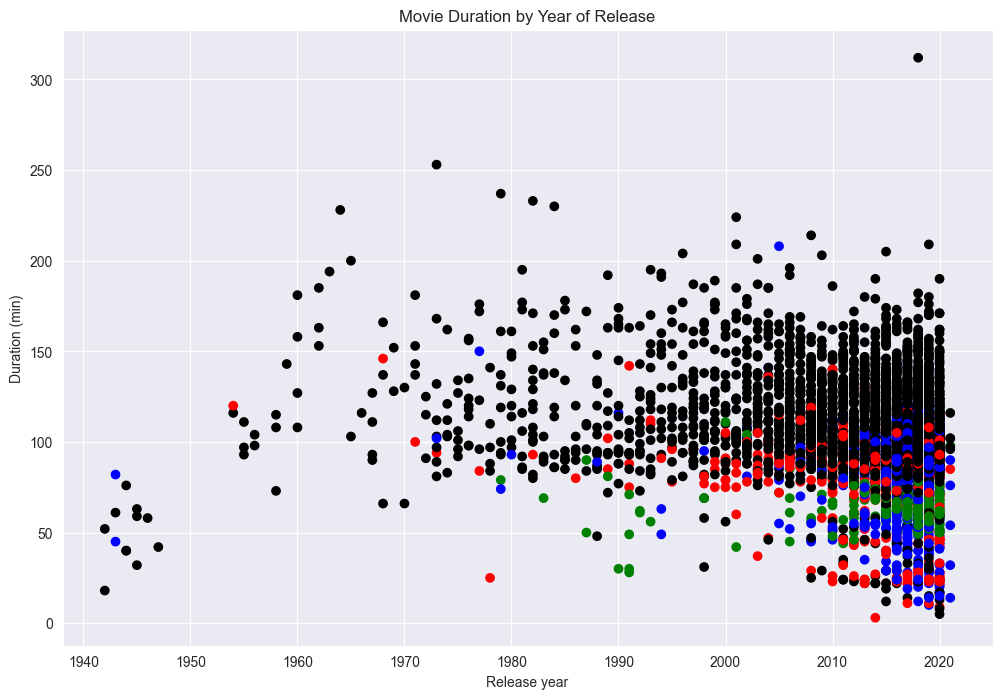

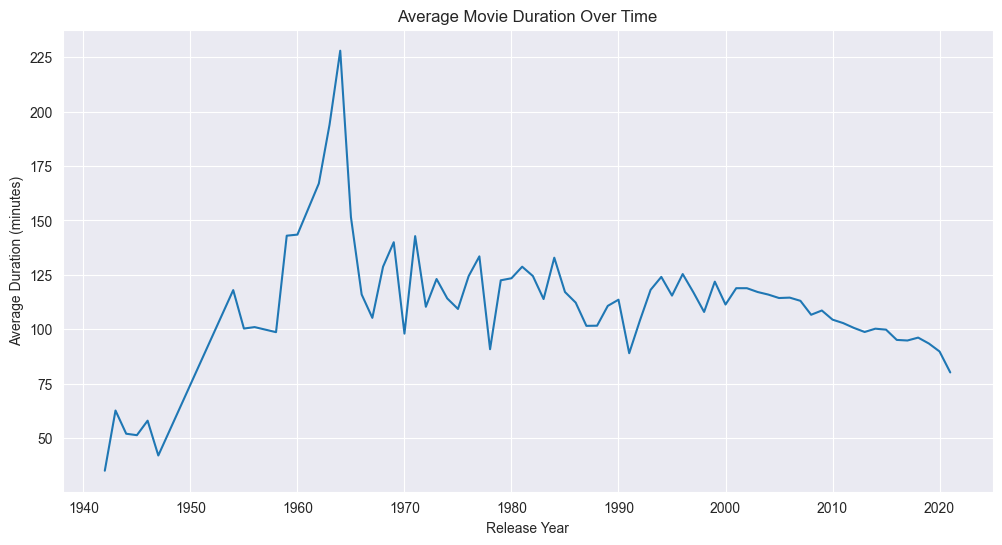

T-statistic: -1.9697949850101069, P-value: 0.052819658857564004
There is no statistically significant difference in movie durations between recent and earlier years.


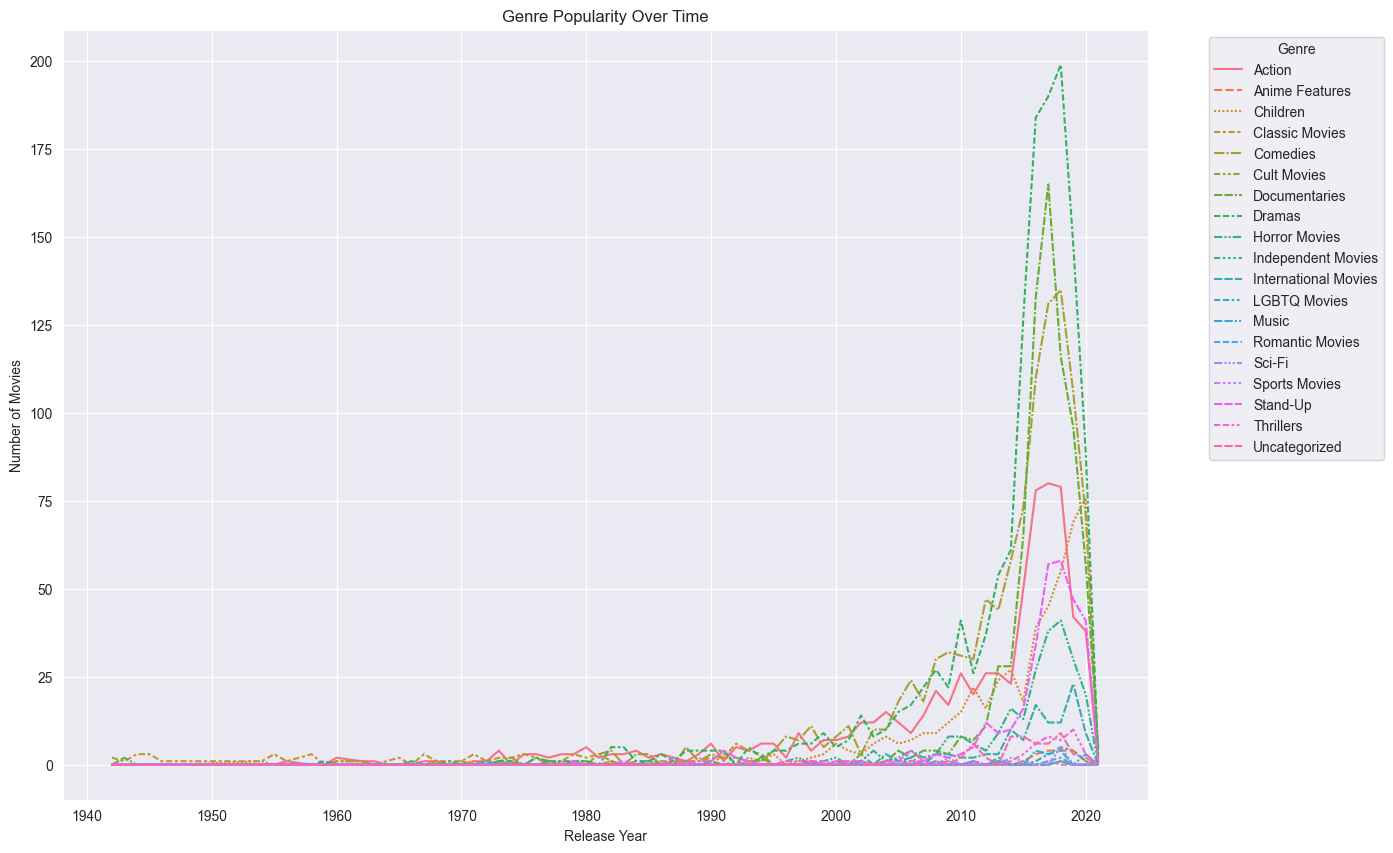

C:\Users\cease\AppData\Local\Temp\ipykernel_7372\3386785048.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


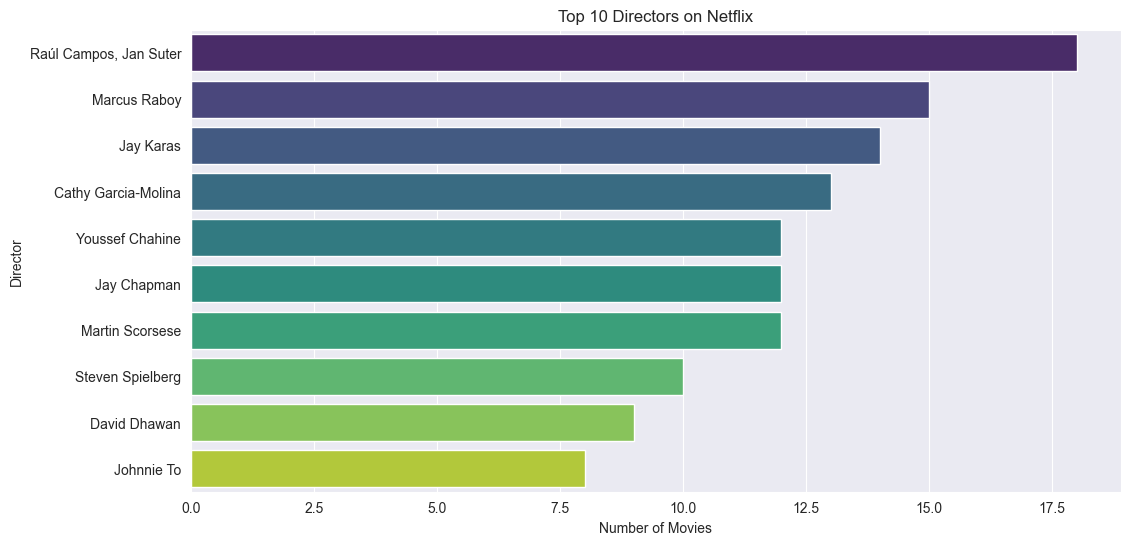

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Select only the columns of interest
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration", "director", "date_added"]]

# Filter out rows where duration is missing
netflix_movies = netflix_movies.dropna(subset=['duration'])

# Define an empty list
colors = []

# Iterate over rows of netflix_movies to set colors based on genre
for label, row in netflix_movies.iterrows():
    if row["genre"] == "Children":
        colors.append("red")
    elif row["genre"] == "Documentaries":
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")

# Set the figure style and initialize a new figure for the scatter plot
plt.figure(figsize=(12, 8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies.release_year, netflix_movies.duration, c=colors)

# Create a title and axis labels
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

# Calculate average movie duration by year
avg_duration_per_year = netflix_movies.groupby('release_year')['duration'].mean().reset_index()

# Plot the average movie duration over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_duration_per_year, x='release_year', y='duration')
plt.title('Average Movie Duration Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.show()

# Statistical analysis: Compare average duration in recent years vs. earlier years
recent_years = avg_duration_per_year[avg_duration_per_year['release_year'] >= 2010]
earlier_years = avg_duration_per_year[avg_duration_per_year['release_year'] < 2010]

# Perform a t-test to see if there is a significant difference
t_stat, p_value = ttest_ind(recent_years['duration'], earlier_years['duration'])

print(f'T-statistic: {t_stat}, P-value: {p_value}')
if p_value < 0.05:
    print("There is a statistically significant difference in movie durations between recent and earlier years.")
else:
    print("There is no statistically significant difference in movie durations between recent and earlier years.")

# Genre Popularity Over Time
# Calculate the number of movies released per genre each year
genre_popularity = netflix_movies.groupby(['release_year', 'genre']).size().unstack().fillna(0)

# Plot the genre popularity over time
plt.figure(figsize=(14, 10))
sns.lineplot(data=genre_popularity)
plt.title('Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Top Directors
# Count the number of movies per director
top_directors = netflix_movies['director'].value_counts().head(10)

# Plot the top directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()
